In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu GRAB và chia train test validate theo tỉ lệ 6-3-1
df = pd.read_csv('VCB_Historical_Data.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [3]:
!pip install pmdarima

You should consider upgrading via the 'C:\Users\ngomi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17345.626, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17343.533, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17345.533, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17345.538, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17343.703, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17347.422, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.295 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))


In [6]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted Opening prices for the next 30 days
print('Predicted Opening prices for the next 30 days:')
print(y_next_30_days)

Predicted Opening prices for the next 30 days:
[74599.97794823 74644.95589645 74689.93384468 74734.91179291
 74779.88974113 74824.86768936 74869.84563758 74914.82358581
 74959.80153404 75004.77948226 75049.75743049 75094.73537872
 75139.71332694 75184.69127517 75229.66922339 75274.64717162
 75319.62511985 75364.60306807 75409.5810163  75454.55896453
 75499.53691275 75544.51486098 75589.4928092  75634.47075743
 75679.44870566 75724.42665388 75769.40460211 75814.38255034
 75859.36049856 75904.33844679]


In [7]:
# 7. Tính RMSE, MSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 14712.584953494072
Testing RMSE: 9968.247664344566
Validation MAE: 12556.8742254488
Testing MAE: 7836.067200419584
Validation MAPE: 13.326105686139925
Testing MAPE: 10.15482570612033


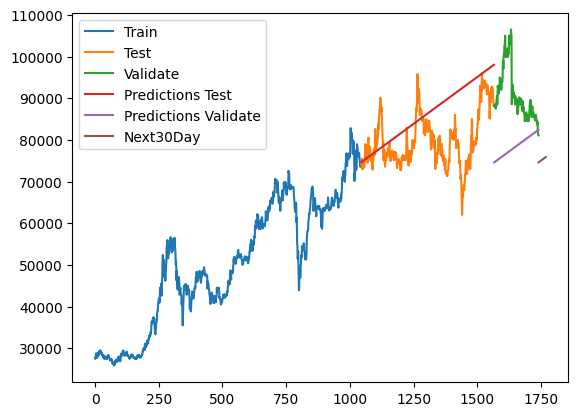

In [8]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions Test', 'Predictions Validate','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=1044, stop=1566, step=1)